# MBTI Analysis

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types.

This project is use python to analyze the MBTIs validity and ability to predict language styles and behaviour online.
Production of a machine learning algorithm that can attempt to determine a person’s personality type based on some text they have written.

## 1. Distribution of personality types

In [56]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import gensim
from gensim.utils import simple_preprocess 
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from textblob import TextBlob
from tqdm import tqdm
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data = pd.read_csv('cleaned_raw.csv')
data = data.drop(data.columns[0], axis=1)
print(data.shape)
data.head()

(8675, 2)


,type,final
0,INFJ,youtube youtube enfp intj moments youtube spor...
1,ENTP,im finding lack posts alarming sex boring posi...
2,INTP,good one youtube course say know thats blessin...
3,INTJ,dear intp enjoyed conversation day esoteric ga...
4,ENTJ,youre fired thats another silly misconception ...


In [81]:
count = Counter(data['type'])
print(count)
sorted_type = sorted(count, key=count.get, reverse=True)

Counter({'INFP': 1832, 'INFJ': 1470, 'INTP': 1304, 'INTJ': 1091, 'ENTP': 685, 'ENFP': 675, 'ISTP': 337, 'ISFP': 271, 'ENTJ': 231, 'ISTJ': 205, 'ENFJ': 190, 'ISFJ': 166, 'ESTP': 89, 'ESFP': 48, 'ESFJ': 42, 'ESTJ': 39})


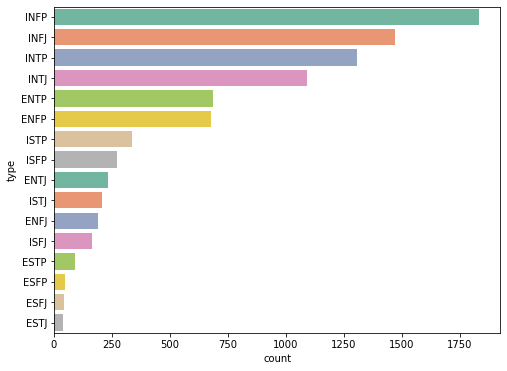

In [84]:
plt.figure(figsize = [8,6])
sns.countplot(y=data['type'], palette ="Set2",order = sorted_type)

## 2. Keywords related to different personality type

In [12]:
def get_top_n_imp_words(corpus,full_corpus,n=10):
    
    vec = TfidfVectorizer().fit(full_corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

imp_words_dict = {}
for personality in tqdm(data['type'].unique()):
    personality_data = data[data['type'] == personality]
#     print(personality)
    imp_words = get_top_n_imp_words(personality_data['posts_preprocessed'],data['posts_preprocessed'])
#     print(imp_words)
    imp_words_dict[personality] = imp_words

100%|██████████| 16/16 [01:45<00:00,  6.62s/it]


In [26]:
def load_mask_image(path):
    mask = np.array(Image.open(path))
    #mask[mask > 200] = 255
    #mask[mask <= 200] = 0
    return mask

mask = load_mask_image('mask.png')

In [27]:
def typewise_properties(pers_type,data = data):
    
    personality_data = data[data['type'] == pers_type]
    text = " ".join(personality_data['posts_preprocessed'].tolist())
    wc = WordCloud(background_color="white", max_words=200, mask=mask,
                   stopwords=stop_words, contour_width=3)

    # Generate a wordcloud
    wc.generate(text)

    # show
    plt.figure(figsize=[20,6])
    plt.subplot(121)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

    plt.subplot(122)
    tuples = imp_words_dict[pers_type]
    words = [x[0] for x in tuples]
    imp = [x[1] for x in tuples]
    sns.barplot(y = words,x = imp)
    plt.title('Important Words')
    plt.xlabel('Importance - tfidf value')

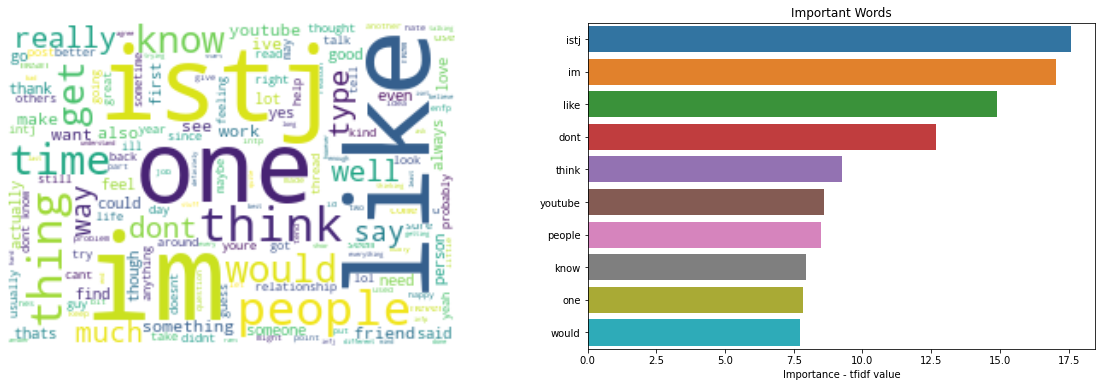

In [28]:
typewise_properties('ISTJ')